# Demographic health data

---

Imported Libraries

In [337]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import json
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import f_classif, SelectKBest
from pickle import dump
import warnings

def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn # ignore annoying warning (from sklearn and seaborn)

pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points
'''NOTE: This affects only the display and not the underlying data, which remains unchanged.'''

'NOTE: This affects only the display and not the underlying data, which remains unchanged.'

## Step 1: Problem statement and data collection

In [338]:
df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv")

df.head(3)

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.207,7637,13.735,6878,12.370,7089,12.750,...,3644,12.900,11.900,13.800,5462,3.100,2.900,3.300,1326,3
1,1003,218022,24757,11.355,26913,12.344,23579,10.815,25213,11.564,...,14692,12.000,11.000,13.100,20520,3.200,3.000,3.500,5479,4
2,1005,24881,2732,10.980,2960,11.897,3268,13.135,3201,12.865,...,2373,19.700,18.600,20.600,3870,4.500,4.200,4.800,887,6


## Step 2: Exploration and data cleaning
- ### 2.1 Summarize DF

In [339]:
# Obtain dimensions

rows, columns = df.shape

print(f"The dimensions of this dataset are: {rows} Rows and {columns} Columns")

The dimensions of this dataset are: 3140 Rows and 108 Columns


In [340]:
# Obtain information about data types and non-null values

df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Data columns (total 108 columns):
 #    Column                                                                         Dtype  
---   ------                                                                         -----  
 0    fips                                                                           int64  
 1    TOT_POP                                                                        int64  
 2    0-9                                                                            int64  
 3    0-9 y/o % of total pop                                                         float64
 4    19-Oct                                                                         int64  
 5    10-19 y/o % of total pop                                                       float64
 6    20-29                                                                          int64  
 7    20-29 y/o % of total pop                         

In [341]:
# Check null values

null_var = df.isnull().sum().loc[lambda x: x > 0] # Number of nulls in each variable.

num_of_null_var = len(null_var) # Number of variables with almost 1 null.

print(f"{null_var}\n\nThe number of null variables are {num_of_null_var}")

Series([], dtype: int64)

The number of null variables are 0


---

- ### 2.2 Eliminate duplicates

In [342]:
# Obtain the number of duplicate values in our dataset

print(f"The number of duplicate values in the dataset is {df.duplicated().sum()}")

The number of duplicate values in the dataset is 0


In [343]:
first_df = df.copy()

- ### 2.3 Eliminate irrelevant information

In [344]:
# Eliminate irrelevant columns

first_df.drop(
    ["fips", "TOT_POP","0-9 y/o % of total pop", "10-19 y/o % of total pop", "20-29 y/o % of total pop",
              "30-39 y/o % of total pop", "40-49 y/o % of total pop", "50-59 y/o % of total pop",
               "60-69 y/o % of total pop", "70-79 y/o % of total pop", "80+ y/o % of total pop",
                "% White-alone", "% Black-alone", "% NA/AI-alone", "% Asian-alone",
                  "% Hawaiian/PI-alone", "% Two or more races", "Percent of adults with less than a high school diploma 2014-18",
                   "Percent of adults with a high school diploma only 2014-18",
                    "Percent of adults completing some college or associate's degree 2014-18",
                     "Percent of adults with a bachelor's degree or higher 2014-18",
                      "Percent of Population Aged 60+", "anycondition_Lower 95% CI", "anycondition_Upper 95% CI",
                       "Obesity_Lower 95% CI", "Obesity_Upper 95% CI", "Heart disease_Lower 95% CI",
                        "Heart disease_Upper 95% CI", "COPD_Lower 95% CI", "COPD_Upper 95% CI", "diabetes_Lower 95% CI",
                         "diabetes_Upper 95% CI", "CKD_Lower 95% CI", "CKD_Upper 95% CI" ],
                    axis = "columns",
                        inplace = True
                        )

first_df.head(3)

,0-9,19-Oct,20-29,30-39,40-49,50-59,60-69,70-79,80+,White-alone pop,...,Obesity_number,Heart disease_prevalence,Heart disease_number,COPD_prevalence,COPD_number,diabetes_prevalence,diabetes_number,CKD_prevalence,CKD_number,Urban_rural_code
0,6787,7637,6878,7089,7582,7738,5826,4050,2014,42660,...,15193,7.900,3345,8.600,3644,12.900,5462,3.100,1326,3
1,24757,26913,23579,25213,27338,29986,29932,20936,9368,190301,...,50761,7.800,13414,8.600,14692,12.000,20520,3.200,5479,4
2,2732,2960,3268,3201,3074,3278,3076,2244,1048,12209,...,8013,11.000,2159,12.100,2373,19.700,3870,4.500,887,6


In [345]:
modification = {} # Dict with {'old names': 'new names'}

for name in first_df.columns:
    
    modification[name] = name.replace(" ", "_").replace("/", "-")

filt_df = first_df.rename(columns = modification)

## Step 3: Analysis of categorical variables

- ### 3.1 Analysis of categorical variables

In [346]:
categorical_var = []

for column in filt_df: 

    if filt_df[column].dtype == 'object':

        categorical_var.append(column)


print(f"Categorical Variables are:\n{categorical_var}\n\nTotal = {len(categorical_var)}")

Categorical Variables are:
['COUNTY_NAME', 'STATE_NAME']

Total = 2


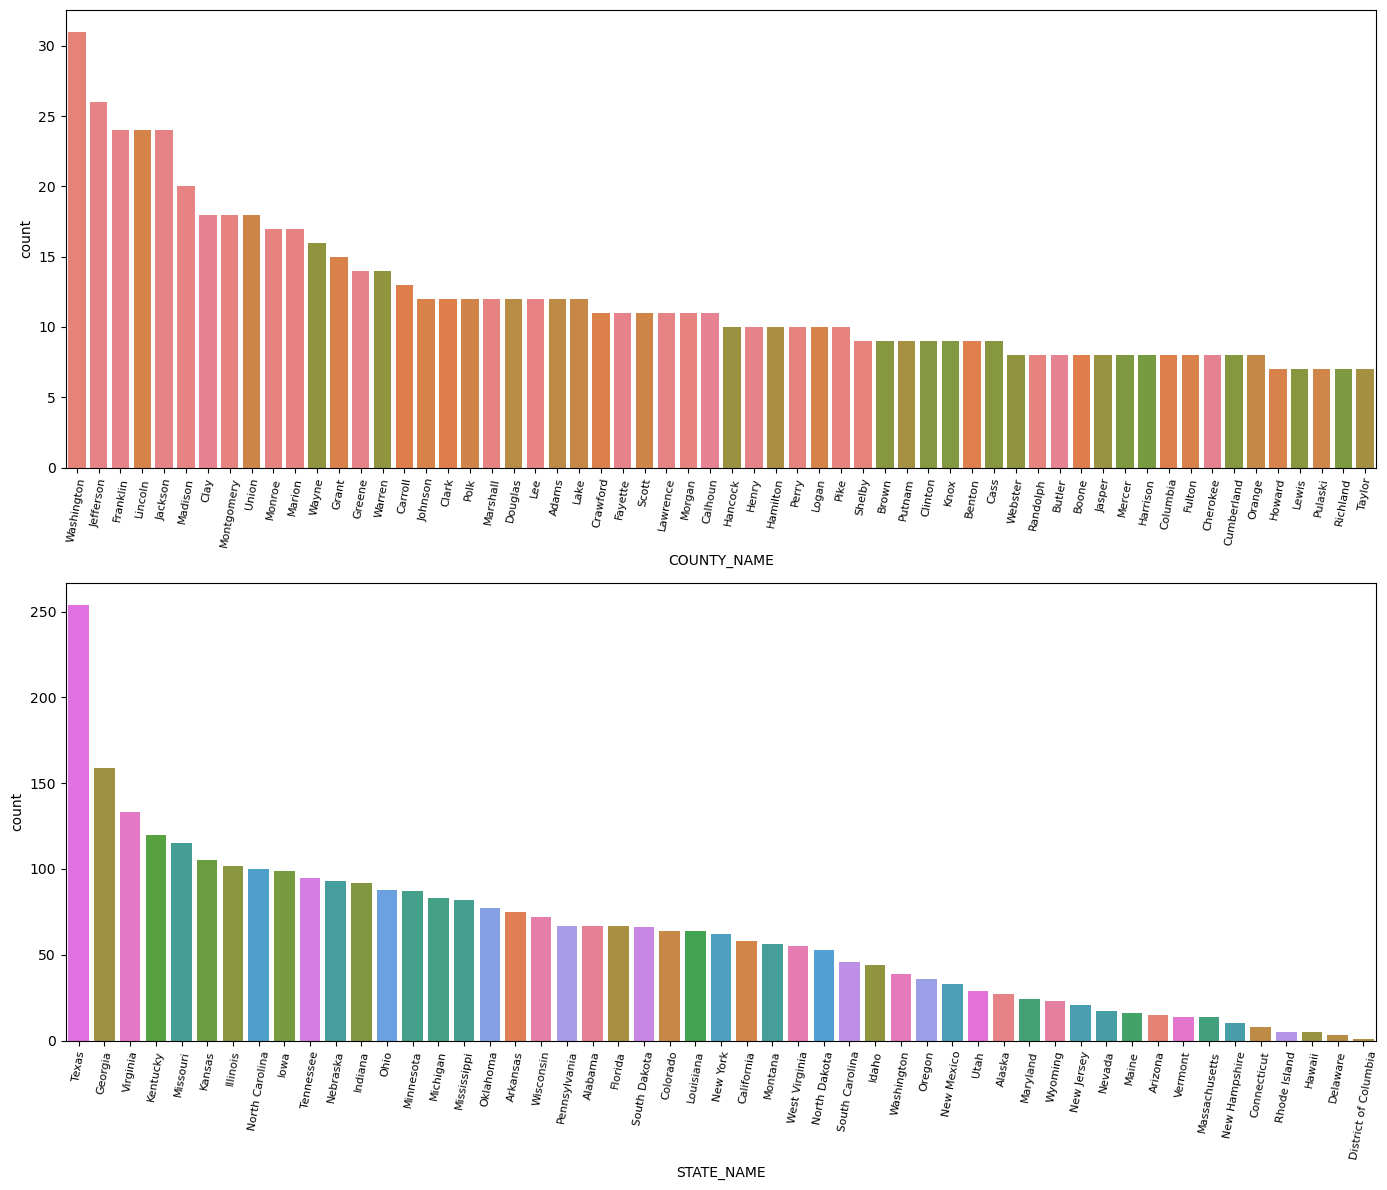

In [347]:
fig, axis = plt.subplots(2, 1, figsize = (14, 12))


# Create Histogram (Countplots)


sns.countplot(ax = axis[0], # Variable 'COUNTY_NAME'
                data = filt_df,
                    x = "COUNTY_NAME",
                        hue = "COUNTY_NAME",
                            order = filt_df['COUNTY_NAME'].sort_values().value_counts().index[:60])


sns.countplot(ax = axis[1], # Variable 'STATE_NAME'
                data = filt_df,
                    x = "STATE_NAME",
                        hue = "STATE_NAME",
                            order = filt_df['STATE_NAME'].sort_values().value_counts().index)

# Rotating X-axis labels

for tick in axis:
    tick.set_xticklabels(tick.get_xticklabels(), rotation = 80, fontsize = 8)

plt.tight_layout()

plt.show()

- ### 3.2 Analysis of numerical variables

In [348]:
numerical_var_int = []
numerical_var_float = []

for column in filt_df: 

    if (filt_df[column].dtype == 'int64') :

        numerical_var_int.append(column)

    elif (filt_df[column].dtype == 'float64'):

        numerical_var_float.append(column)

print('============================================')
print(f"Numerical (int) Variables are:\n\n{numerical_var_int}\n\nTotal = {len(numerical_var_int)}")
print('============================================')
print(f"Numerical (float64) Variables are:\n\n{numerical_var_float}\n\nTotal = {len(numerical_var_float)}")
print('============================================')

Numerical (int) Variables are:

['0-9', '19-Oct', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+', 'White-alone_pop', 'Black-alone_pop', 'Native_American-American_Indian-alone_pop', 'Asian-alone_pop', 'Hawaiian-Pacific_Islander-alone_pop', 'Two_or_more_races_pop', 'POP_ESTIMATE_2018', 'N_POP_CHG_2018', 'GQ_ESTIMATES_2018', 'Less_than_a_high_school_diploma_2014-18', 'High_school_diploma_only_2014-18', "Some_college_or_associate's_degree_2014-18", "Bachelor's_degree_or_higher_2014-18", 'POVALL_2018', 'MEDHHINC_2018', 'CI90LBINC_2018', 'CI90UBINC_2018', 'Civilian_labor_force_2018', 'Employed_2018', 'Unemployed_2018', 'Median_Household_Income_2018', 'ICU_Beds_x', 'Total_Population', 'Population_Aged_60+', 'STATE_FIPS', 'CNTY_FIPS', 'county_pop2018_18_and_older', 'anycondition_number', 'Obesity_number', 'Heart_disease_number', 'COPD_number', 'diabetes_number', 'CKD_number', 'Urban_rural_code']

Total = 43
Numerical (float64) Variables are:

['R_birth_2018', 'R_death_2018', 'R_NA

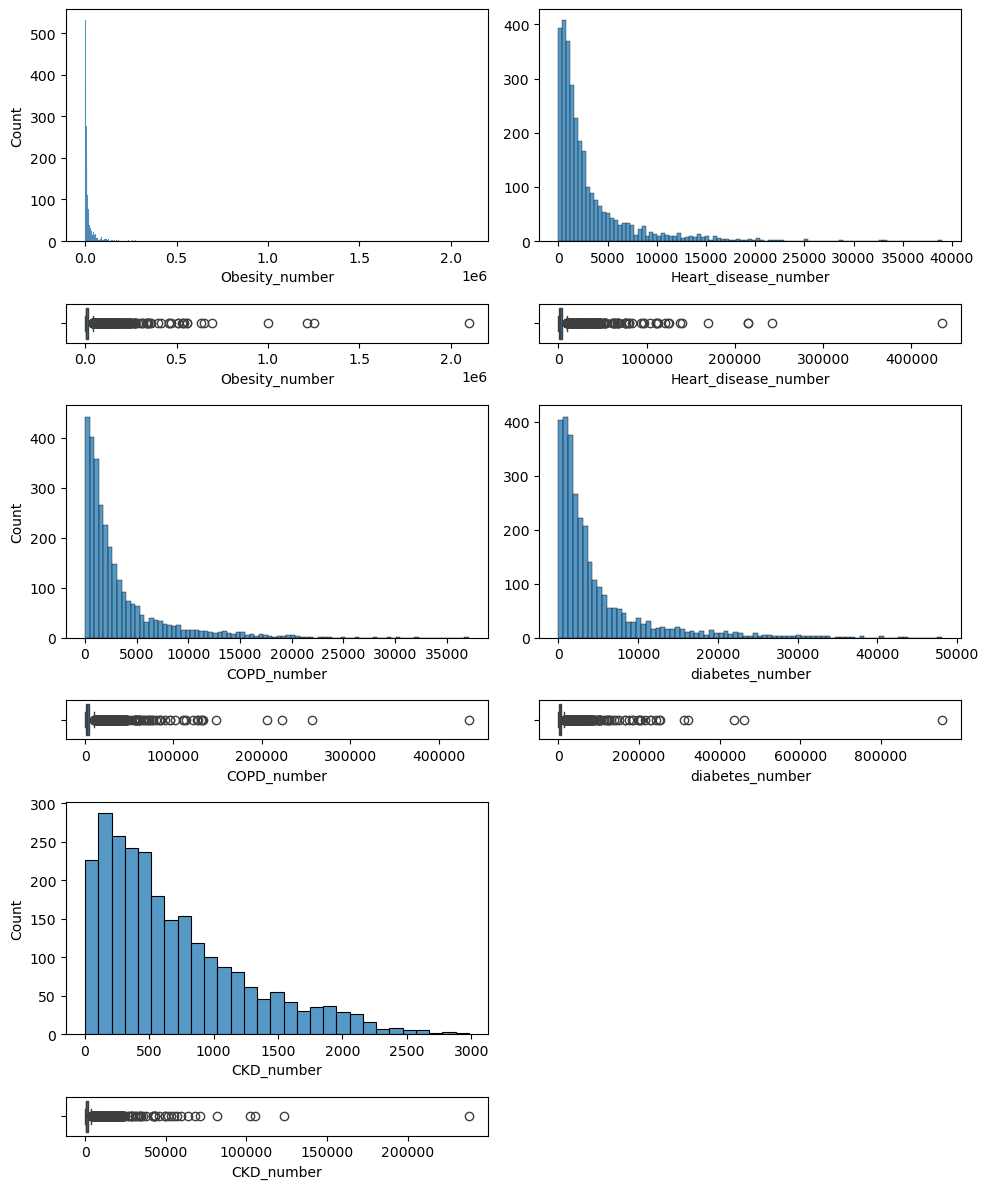

In [349]:
fig, axis = plt.subplots(6, 2,
                            figsize = (10, 12),
                                gridspec_kw={'height_ratios': [6, 1, 6, 1, 6, 1]})


# ==========================Variable Obesity_number================================  
sns.histplot(ax = axis[0, 0],
                data = filt_df, 
                    x = "Obesity_number")

sns.boxplot(ax = axis[1, 0],
                data = filt_df,
                    x = "Obesity_number")


# ==========================Variable Heart_disease_number=======================
sns.histplot(ax = axis[0, 1],
                data = filt_df[filt_df['Obesity_number']<100_000], 
                    x = "Heart_disease_number").set(ylabel = None)

sns.boxplot(ax = axis[1, 1],
                data = filt_df,
                     x = "Heart_disease_number")


# ==========================Variable COPD_number====================
sns.histplot(ax = axis[2, 0],
                data = filt_df[filt_df['Obesity_number']<100_000], 
                     x = "COPD_number")

sns.boxplot(ax = axis[3, 0],
                data = filt_df, 
                     x = "COPD_number")


# ==========================Variable diabetes_number======
sns.histplot(ax = axis[2, 1],
                data = filt_df[filt_df['Obesity_number']<100_000],
                    x = "diabetes_number").set(ylabel = None)

sns.boxplot(ax = axis[3, 1],
                data = filt_df,
                    x = "diabetes_number")


# ==========================Variable CKD_number====================
sns.histplot(ax = axis[4, 0],
                data = filt_df[filt_df['Obesity_number']<25_000],
                    x = "CKD_number")

sns.boxplot(ax = axis[5, 0],
                data = filt_df,
                    x = "CKD_number")


# Remove the empty axes
fig.delaxes(ax = axis[4,1])
fig.delaxes(ax = axis[5,1])

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

----------**Breakdown**----------

- Distributions:

    Each histogram shows a right-skewed distribution, with a significant portion of the data clustered towards the lower end, indicating a higher frequency of smaller values.
The skewness of the data suggests that most values are small, but there are a few extremely high values (outliers).

- Box Plots:

    The box plots beneath each histogram further highlight the presence of outliers in the dataset.
Outliers are seen as individual data points that lie far from the rest of the data, with values significantly larger than the upper quartile.

---

## Step 4: Analysis of multivariate variables



- ### 4.1 From string to numerical transformation --> JSON saving

In [350]:
# Encoding Variables

def encoding(dataset, variable, json_path):

    factorize = pd.factorize(dataset[variable])

    parsing_dict = {}

    indexes = factorize[1]

    set_factor = list(set(factorize[0]))

    for index in range(len(factorize[1])):
        parsing_dict.update({indexes[index]: int(set_factor[index])})

    with open(json_path, "w") as f:
        json.dump(parsing_dict, f)
        

In [351]:
for variable in categorical_var:
    encoding(filt_df, variable, f"../data/interim/transform_{variable}.json")

In [352]:
# Opening Variables

def open_encoded_var(dataset, variable, json_path):

    with open(json_path, "r") as f:
        job_dict = json.load(f)

    dataset[variable] = dataset[variable].apply(lambda x: job_dict.get(x))

In [353]:
for variable in categorical_var:

    open_encoded_var(filt_df, variable, f"../data/interim/transform_{variable}.json")

- ### 4.2 Correlation matrix

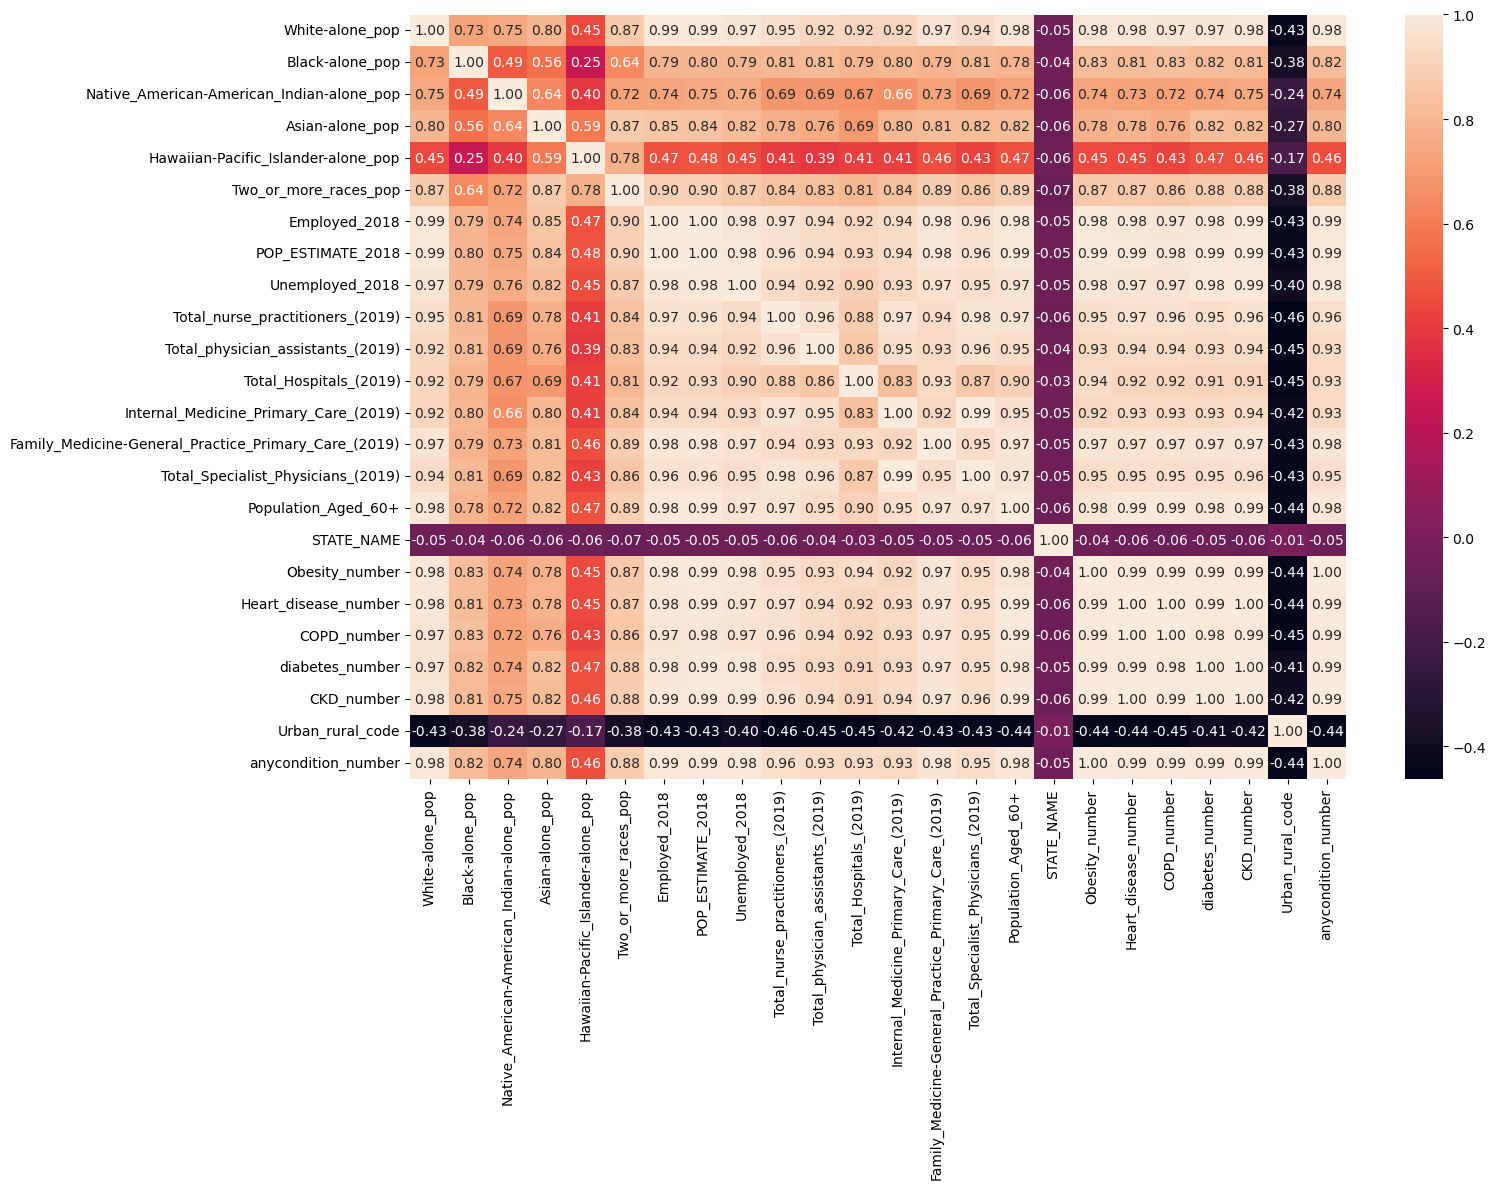

In [356]:
fig, axes = plt.subplots(figsize=(16, 12))


sns.heatmap(filt_df[['White-alone_pop', 'Black-alone_pop', 'Native_American-American_Indian-alone_pop', 'Asian-alone_pop', 'Hawaiian-Pacific_Islander-alone_pop',
         'Two_or_more_races_pop', 'Employed_2018', 'POP_ESTIMATE_2018', 'Unemployed_2018', 'Total_nurse_practitioners_(2019)',
         'Total_physician_assistants_(2019)', 'Total_Hospitals_(2019)', 'Internal_Medicine_Primary_Care_(2019)', 
        'Family_Medicine-General_Practice_Primary_Care_(2019)', 'Total_Specialist_Physicians_(2019)', 'Population_Aged_60+', 'STATE_NAME',
         'Obesity_number', 'Heart_disease_number', 'COPD_number', 'diabetes_number', 'CKD_number', 'Urban_rural_code', 'anycondition_number']].corr(),
                            annot = True,
                                 fmt = ".2f")


plt.tight_layout()


plt.show()

----------**Conclusions**----------

Highly Correlated Variables:

- There are several strong positive correlations (values close to 1) among demographic and health-related features. For example:
    - White-alone_pop and POP_ESTIMATE_2018 have a very high correlation (0.99), suggesting that regions with higher total populations tend to have more white residents.

    - Obesity_number, Heart_disease_number, COPD_number, diabetes_number, and CKD_number all show high correlations with each other, indicating a possible clustering of health conditions.

    - Total nurse practitioners (2019) and Total hospitals (2019) are strongly positively correlated, implying that areas with more hospitals generally have more nurse practitioners.

- Negative Correlations:

    - Urban_rural_code is negatively correlated with many of the health-related and demographic variables, suggesting that rural areas might have lower values for these features compared to urban ones.

    - There is a noticeable negative correlation between Urban_rural_code and healthcare metrics like Total nurse practitioners (2019).

- Interesting Patterns:

    - Variables like STATE_NAME seem to have little to no meaningful correlation with other variables, as indicated by correlations close to zero.
    
    - The variables related to healthcare practitioners, such as Internal_Medicine_Primary_Care (2019), Family_Medicine-General_Practice_Primary_Care (2019), and Total_Specialist_Physicians (2019), exhibit strong interrelationships.

---

## Step 5: Feature engineering

- ### 5.1 Outliers analysis

In [357]:
total_stats = filt_df.describe()

total_stats

,0-9,19-Oct,20-29,30-39,40-49,50-59,60-69,70-79,80+,White-alone_pop,...,Obesity_number,Heart_disease_prevalence,Heart_disease_number,COPD_prevalence,COPD_number,diabetes_prevalence,diabetes_number,CKD_prevalence,CKD_number,Urban_rural_code
count,3140.000,3140.000,3140.000,3140.000,3140.000,3140.000,3140.000,3140.000,3140.000,3140.000,...,3140.000,3140.000,3140.000,3140.000,3140.000,3140.000,3140.000,3140.000,3140.000,3140.000
mean,12740.303,13367.977,14469.332,13916.490,12885.214,13638.032,11916.213,7220.311,4035.542,79659.788,...,25276.132,8.608,5597.593,9.095,5827.242,13.074,9326.578,3.446,2466.234,4.635
std,41807.302,42284.392,49577.725,48990.952,43472.190,42720.629,34518.582,20287.498,12063.782,237288.045,...,74466.835,1.759,15615.285,2.345,15720.552,2.724,29754.601,0.568,7730.422,1.510
min,0.000,0.000,0.000,11.000,4.000,14.000,20.000,6.000,0.000,24.000,...,25.000,3.500,7.000,3.500,7.000,6.100,11.000,1.800,3.000,1.000
25%,1280.500,1374.500,1263.750,1232.750,1245.250,1483.000,1476.500,950.750,533.000,9008.750,...,3075.000,7.400,798.500,7.300,815.000,11.200,1187.750,3.100,314.750,3.000
50%,3057.000,3274.000,3108.000,3000.500,3048.500,3515.500,3410.000,2177.000,1160.000,22069.000,...,7182.500,8.600,1814.500,8.900,1963.500,12.800,2743.000,3.400,718.000,5.000
75%,8097.000,8822.250,8976.250,8314.250,8120.500,9157.250,8710.500,5574.000,2899.750,58985.750,...,18542.500,9.800,4376.000,10.600,4727.000,14.800,6679.250,3.800,1776.250,6.000
max,1208253.000,1239139.000,1557073.000,1501844.000,1350076.000,1306003.000,1014325.000,572530.000,356275.000,7151444.000,...,2097906.000,15.100,434790.000,19.900,434075.000,25.600,952335.000,6.200,237766.000,6.000


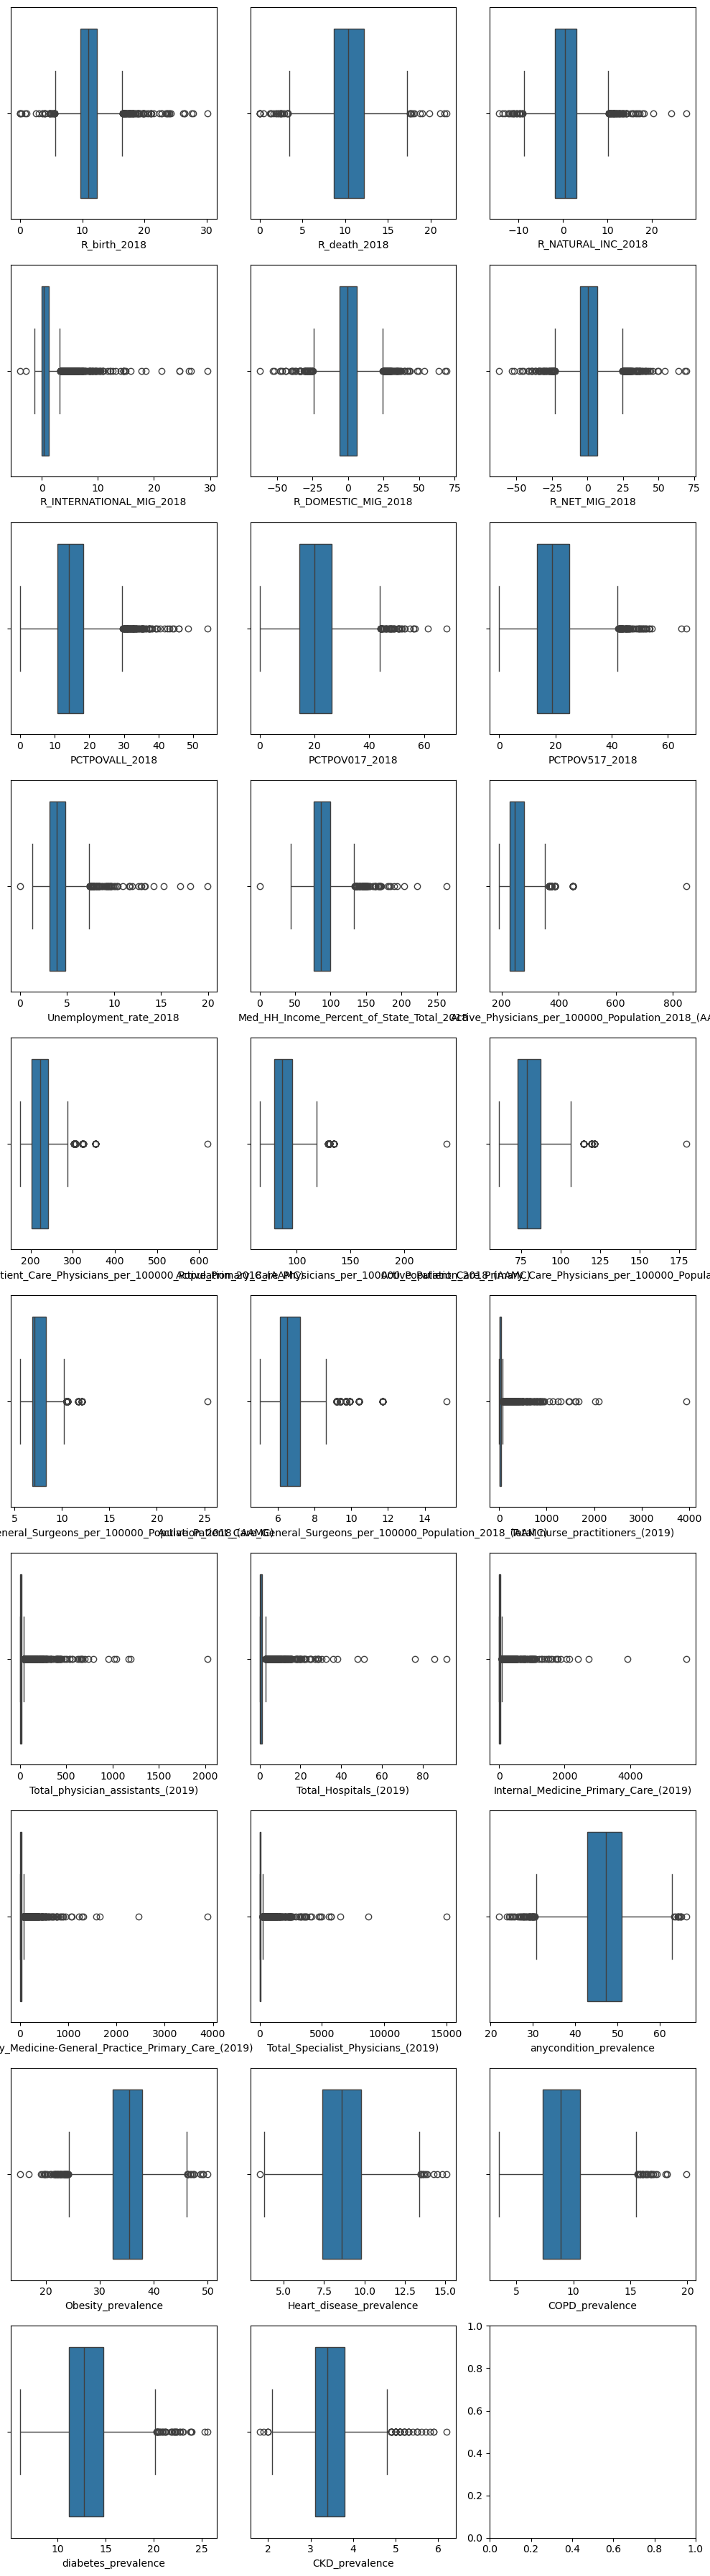

In [358]:
fig, ax = plt.subplots(10,3, figsize=(10, 36))

row, col = 0, 0
for var in numerical_var_float:
    sns.boxplot(ax = ax[row,col], data = filt_df, x=var)
    col += 1
    if col == 3: 
        row += 1 
        col = 0

plt.tight_layout()
plt.show()

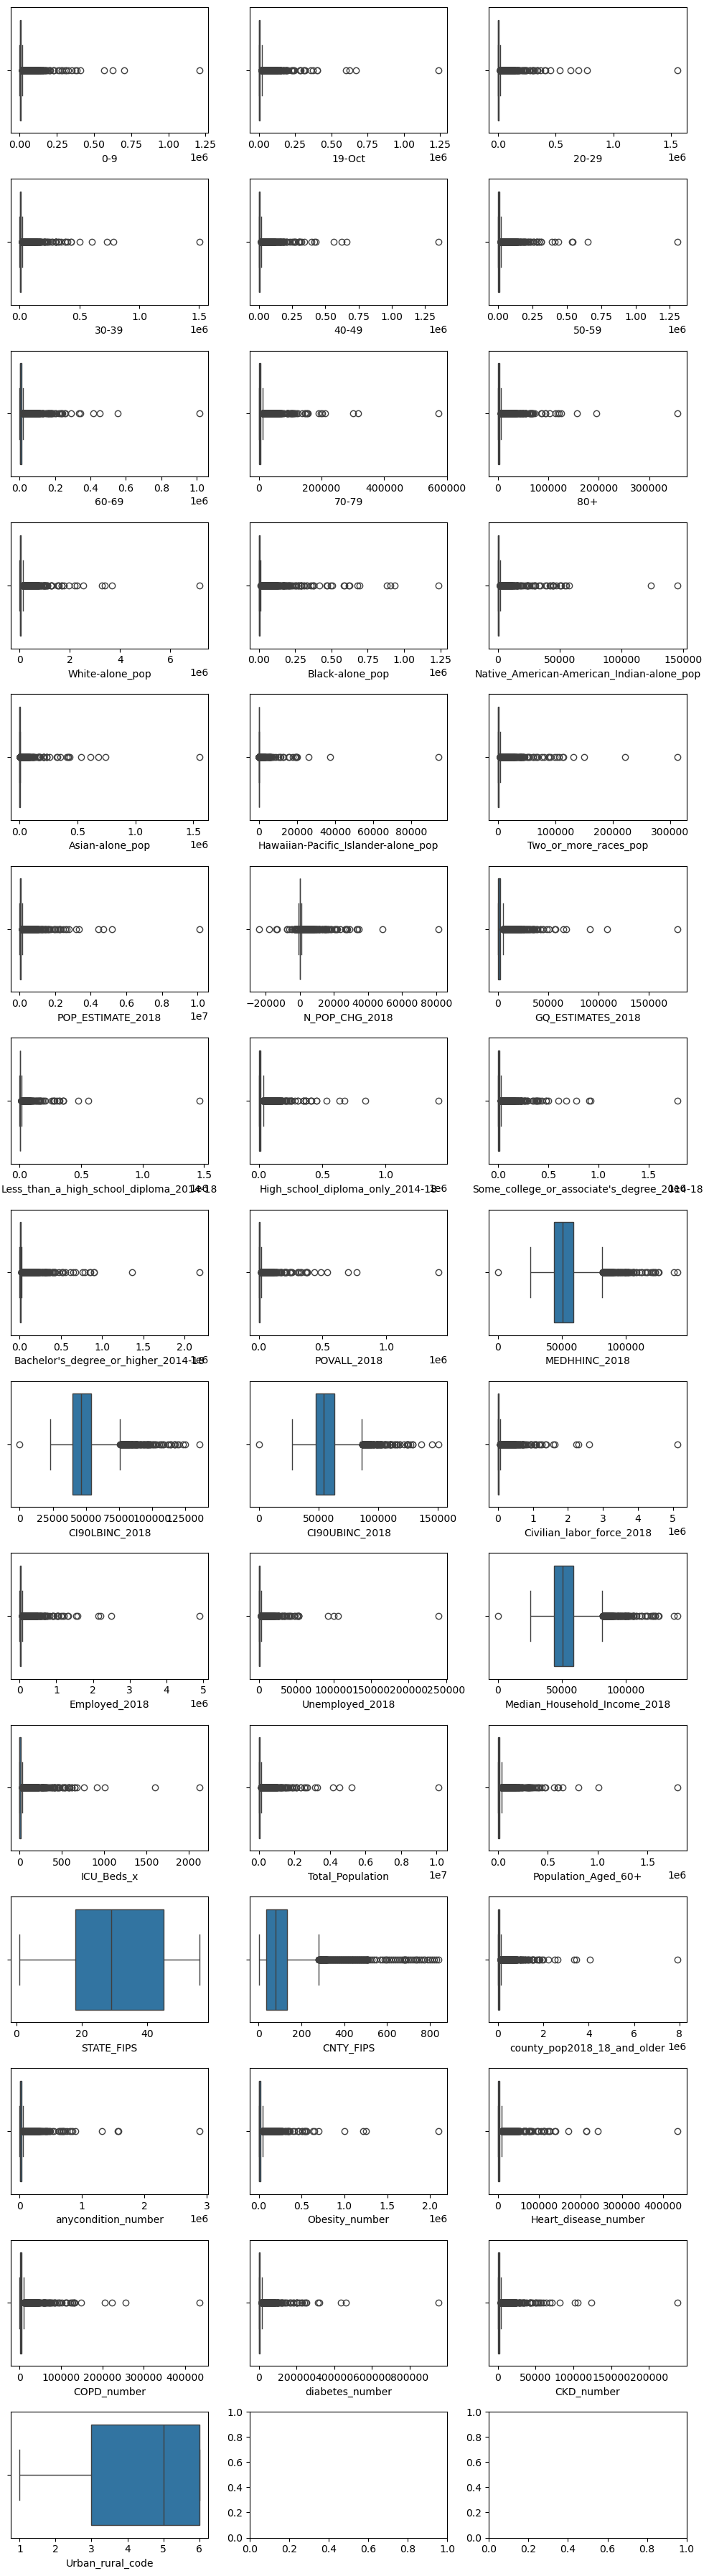

In [359]:
fig, ax = plt.subplots(15,3, figsize=(10, 36))

row, col = 0, 0
for var in numerical_var_int:
    sns.boxplot(ax = ax[row,col], data = filt_df, x=var)
    col += 1
    if col == 3: 
        row += 1 
        col = 0

plt.tight_layout()
plt.show()

- ### 5.2 Upper and lower limits of outliers variables --> <i>JSON saving</i>

In [360]:
# Save Outliers

def def_outliers(total_stats, variable, json_file):

    individual_stats = total_stats[variable] # Save the stats for IQR

    iqr = individual_stats["75%"] - individual_stats["25%"]
    upper_limit = individual_stats["75%"] + (2 * iqr) 
    lower_limit = individual_stats["25%"] - (2 * iqr)

    if (lower_limit < 0): lower_limit = 0

    print(f"\nThe upper_limit of Variable {variable} is {round(upper_limit, 3)}, the lower_limit is {round(lower_limit, 3)} and the IQR is {round(iqr, 3)}")
    print('                      ==========================================                  ')
    with open(json_file, "w") as f:
        json.dump({
            "upper_limit": upper_limit,
            "lower_limit": lower_limit
        }, f)

In [361]:

for variable in numerical_var_int:
        def_outliers(total_stats, variable, f"../data/interim/outliers_{variable}.json")
   


The upper_limit of Variable 0-9 is 21730.0, the lower_limit is 0 and the IQR is 6816.5

The upper_limit of Variable 19-Oct is 23717.75, the lower_limit is 0 and the IQR is 7447.75

The upper_limit of Variable 20-29 is 24401.25, the lower_limit is 0 and the IQR is 7712.5

The upper_limit of Variable 30-39 is 22477.25, the lower_limit is 0 and the IQR is 7081.5

The upper_limit of Variable 40-49 is 21871.0, the lower_limit is 0 and the IQR is 6875.25

The upper_limit of Variable 50-59 is 24505.75, the lower_limit is 0 and the IQR is 7674.25

The upper_limit of Variable 60-69 is 23178.5, the lower_limit is 0 and the IQR is 7234.0

The upper_limit of Variable 70-79 is 14820.5, the lower_limit is 0 and the IQR is 4623.25

The upper_limit of Variable 80+ is 7633.25, the lower_limit is 0 and the IQR is 2366.75

The upper_limit of Variable White-alone_pop is 158939.75, the lower_limit is 0 and the IQR is 49977.0

The upper_limit of Variable Black-alone_pop is 17011.0, the lower_limit is 0 and

In [362]:
for variable in numerical_var_float:
        def_outliers(total_stats, variable, f"../data/interim/outliers_{variable}.json")


The upper_limit of Variable R_birth_2018 is 17.8, the lower_limit is 4.3 and the IQR is 2.7

The upper_limit of Variable R_death_2018 is 19.2, the lower_limit is 1.7 and the IQR is 3.5

The upper_limit of Variable R_NATURAL_INC_2018 is 12.6, the lower_limit is 0 and the IQR is 4.8

The upper_limit of Variable R_INTERNATIONAL_MIG_2018 is 3.9, the lower_limit is 0 and the IQR is 1.3

The upper_limit of Variable R_DOMESTIC_MIG_2018 is 30.4, the lower_limit is 0 and the IQR is 12.2

The upper_limit of Variable R_NET_MIG_2018 is 30.475, the lower_limit is 0 and the IQR is 11.825

The upper_limit of Variable PCTPOVALL_2018 is 33.3, the lower_limit is 0 and the IQR is 7.5

The upper_limit of Variable PCTPOV017_2018 is 49.9, the lower_limit is 0 and the IQR is 11.8

The upper_limit of Variable PCTPOV517_2018 is 47.9, the lower_limit is 0 and the IQR is 11.5

The upper_limit of Variable Unemployment_rate_2018 is 8.2, the lower_limit is 0 and the IQR is 1.7

The upper_limit of Variable Med_HH_I

- ### 5.3 Copy 2 DataFrames: with and without outliers

In [363]:
df_with_outliers = filt_df.copy()
df_without_outliers = filt_df.copy()

'''Todos los Outliers modificados los guardaremos actualizaremos en df_sin_outliers'''

'Todos los Outliers modificados los guardaremos actualizaremos en df_sin_outliers'

In [364]:
# Open Outliers JSON

def open_outliers(dataset_without_outliers, variable, json_path):

    with open(json_path, "r") as f:
        outliers = json.load(f)

    upper_limit_ = outliers["upper_limit"]

    lower_limit_ = outliers["lower_limit"]

    dataset_without_outliers[variable] = dataset_without_outliers[variable].apply(
        lambda x: upper_limit_ if (x > upper_limit_) else (lower_limit_ if (x < lower_limit_) else x)
        )

In [365]:
all_num = numerical_var_int + numerical_var_float
len(all_num)


72

In [366]:
for variable in all_num:
    open_outliers(df_without_outliers, variable, f"../data/interim/outliers_{variable}.json")

- ### 5.4 Missing value analysis

In [368]:
null = filt_df.isna().sum()
null

0-9                    0
19-Oct                 0
20-29                  0
30-39                  0
40-49                  0
                      ..
diabetes_prevalence    0
diabetes_number        0
CKD_prevalence         0
CKD_number             0
Urban_rural_code       0
Length: 74, dtype: int64

- ### 5.5 Feature Scaling

    - #### 5.5.1 Train Test

In [369]:
def train_test(target_var, df, test_size=0.2, random_state=42):
    
    X = df.drop(columns = target_var)
    y = df[target_var]

    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                         test_size = test_size,
                                                           random_state = random_state)
    
    return X_train, X_test, y_train, y_test

In [370]:
# With Outliers
X_train_with_outliers, X_test_with_outliers, y_train, y_test = train_test('anycondition_number', df_with_outliers)

# Without Outliers
X_train_without_outliers, X_test_without_outliers, _, _ = train_test('anycondition_number', df_without_outliers)

In [313]:
X_test_with_outliers.head(3)

,0-9,19-Oct,20-29,30-39,40-49,50-59,60-69,70-79,80+,White-alone_pop,...,Obesity_number,Heart_disease_prevalence,Heart_disease_number,COPD_prevalence,COPD_number,diabetes_prevalence,diabetes_number,CKD_prevalence,CKD_number,Urban_rural_code
2893,812,903,1107,1251,1213,1266,1114,795,577,6036,...,2769,9.300,698,9.800,734,14.800,1107,3.900,293,6
2968,30843,29948,41468,36139,29901,34984,34993,21751,9778,222752,...,63722,6.500,13982,6.000,12803,10.100,21777,2.800,5976,3
1064,2076,2129,2244,2419,2423,2338,1912,1341,526,15940,...,5927,13.000,1768,16.800,2289,19.100,2604,4.400,594,6


> NOTE: Only predictor variables should be scaled, never the target.

---

- #### 5.5.2 Normalization

In [371]:
def norm(X_train,
          X_test,
            type_df: str): # with OR without outliers

    scaler = StandardScaler()
    scaler.fit(X_train)
    
    X_train_norm = scaler.transform(X_train)
    X_train_norm = pd.DataFrame(X_train_norm, 
                                index = X_train.index,
                                  columns = X_train.columns)

    X_test_norm = scaler.transform(X_test)
    X_test_norm = pd.DataFrame(X_test_norm,
                                index = X_test.index,
                                  columns = X_test.columns)

    dump(scaler, open(f'../data/interim/normalized_{type_df}.sav', 'wb'))

    return X_train_norm, X_test_norm

In [372]:
# With Outliers
X_train_with_outliers_norm, X_test_with_outliers_norm = norm(X_train_with_outliers,
                                                              X_test_with_outliers,
                                                                'with_outliers')


# Without Outliers
X_train_without_outliers_norm, X_test_without_outliers_norm = norm(X_train_without_outliers,
                                                                    X_test_without_outliers,
                                                                      'without_outliers')

---

- #### 5.5.3 Min-Max Scaling

In [373]:
def minmax(X_train,
            X_test,
              type_df: str): # with OR without outliers

    scaler = MinMaxScaler()
    scaler.fit(X_train)
    
    X_train_minmax = scaler.transform(X_train)
    X_train_minmax = pd.DataFrame(X_train_minmax,
                                   index = X_train.index, 
                                    columns=X_train.columns)

    X_test_minmax = scaler.transform(X_test)
    X_test_minmax = pd.DataFrame(X_test_minmax,
                                  index = X_test.index,
                                    columns=X_test.columns)
    
    dump(scaler, open(f'../data/interim/minmax_{type_df}.sav', 'wb'))

    return X_train_minmax, X_test_minmax

In [374]:
# With Outliers
X_train_with_outliers_minmax, X_test_with_outliers_minmax = minmax(X_train_with_outliers,
                                                                    X_test_with_outliers,
                                                                      'with_outliers')

# Without Outliers
X_train_without_outliers_minmax, X_test_without_outliers_minmax = minmax(X_train_without_outliers,
                                                                          X_test_without_outliers,
                                                                            'without_outliers')

> NOTE: In this step we must make sure that all our variables are numeric, and, if not, as we have seen in the steps at the beginning, we should transform them.

---

## Step 6: Feature selection



In [377]:
def kselection(X_train,
                X_test,
                  y_train,
                    k, # This function selects the 'k' best feat. from our dataset
                      type_df: str): # with OR without outliers

    selection_model = SelectKBest(f_classif, k=k)
    selection_model.fit(X_train, y_train)

    cols = selection_model.get_support()

    X_train_sel = pd.DataFrame(selection_model.transform(X_train),
                                columns=X_train.columns.values[cols]) 
    X_test_sel = pd.DataFrame(selection_model.transform(X_test),
                               columns=X_test.columns.values[cols])

    dump(selection_model, open(f'../data/interim/selection_model_{type_df}.sav', 'wb'))

    return X_train_sel, X_test_sel   

In [378]:
# With Outliers
X_train_with_outliers_sel, X_test_with_outliers_sel = kselection(X_train_with_outliers,
                                                                  X_test_with_outliers,
                                                                    y_train, 70,
                                                                      'with_outliers')

# Without Outliers
X_train_without_outliers_sel, X_test_without_outliers_sel = kselection(X_train_without_outliers,
                                                                        X_test_without_outliers,
                                                                          y_train, 70,
                                                                            'without_outliers')

- ### 6.1  Applying the filter to the normalized and minmax scaled data frames

In [379]:
#=========================normalized========================

# X_train normalized----------------
    # With Outliers
X_train_with_outliers_norm_sel = X_train_with_outliers_norm[X_train_with_outliers_sel.columns]
    # Without Outliers
X_train_without_outliers_norm_sel = X_train_without_outliers_norm[X_train_with_outliers_sel.columns]

# X_test normalized-----------------
    # With Outliers
X_test_with_outliers_norm_sel = X_test_with_outliers_norm[X_test_with_outliers_sel.columns]
    # Without Outliers
X_test_without_outliers_norm_sel = X_test_without_outliers_norm[X_test_with_outliers_sel.columns]

#==========================min-max==========================

# X_train min-max-------------------
    # With Outliers
X_train_with_outliers_minmax_sel = X_train_with_outliers_minmax[X_train_with_outliers_sel.columns]
    # Without Outliers
X_train_without_outliers_minmax_sel = X_train_without_outliers_minmax[X_train_without_outliers_sel.columns]

# X_test min-max--------------------
    # With Outliers
X_test_with_outliers_minmax_sel = X_test_with_outliers_minmax[X_test_with_outliers_sel.columns]
    # Without Outliers
X_test_without_outliers_minmax_sel = X_test_without_outliers_minmax[X_test_without_outliers_sel.columns]

- ### 6.2 Saving the CSV files

In [380]:
# Train data frames
X_train_with_outliers_sel.to_csv('../data/processed/X_train_with_outliers_sel.csv', index=False)
X_train_without_outliers_sel.to_csv('../data/processed/X_train_without_outliers_sel.csv', index=False)
X_train_with_outliers_norm_sel.to_csv('../data/processed/X_train_with_outliers_norm_sel.csv', index=False)
X_train_without_outliers_norm_sel.to_csv('../data/processed/X_train_without_outliers_norm_sel.csv', index=False)
X_train_with_outliers_minmax_sel.to_csv('../data/processed/X_train_with_outliers_minmax_sel.csv', index=False)
X_train_without_outliers_minmax_sel.to_csv('../data/processed/X_train_without_outliers_minmax_sel.csv', index=False)
y_train.to_csv('../data/processed/y_train.csv', index=False)

# Test data frames
X_test_with_outliers_sel.to_csv('../data/processed/X_test_with_outliers_sel.csv', index=False)
X_test_without_outliers_sel.to_csv('../data/processed/X_test_without_outliers_sel.csv', index=False)
X_test_with_outliers_norm_sel.to_csv('../data/processed/X_test_with_outliers_norm_sel.csv', index=False)
X_test_without_outliers_norm_sel.to_csv('../data/processed/X_test_without_outliers_norm_sel.csv', index=False)
X_test_with_outliers_minmax_sel.to_csv('../data/processed/X_test_with_outliers_minmax_sel.csv', index=False)
X_test_without_outliers_minmax_sel.to_csv('../data/processed/X_test_without_outliers_minmax_sel.csv', index=False)
y_test.to_csv('../data/processed/y_test.csv', index=False)